<a href="https://colab.research.google.com/github/Guru-Shanmukh/NLP-project/blob/main/Text_to_image_generation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install accelerate

In [ ]:
!pip install --upgrade diffusers transformers -q

Keyword arguments {'use_auth_token': 'your_hugging_face_auth_token'} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/200 [00:00<?, ?it/s]

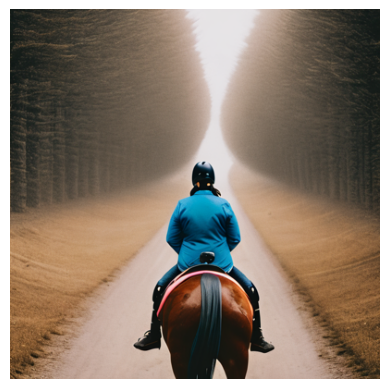

In [ ]:
# Make sure to install accelerate for optimization
# !pip install accelerate

from pathlib import Path
import torch
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
from PIL import Image
import matplotlib.pyplot as plt

# Configuration class
class CFG:
    device = "cuda" if torch.cuda.is_available() else "cpu"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 200
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400, 400)
    image_gen_guidance_scale = 18
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

# Initialize model for image generation
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16, revision="fp16", use_auth_token='your_hugging_face_auth_token'
)
image_gen_model = image_gen_model.to(CFG.device)

# Image generation function
def generate_image(prompt, model):
    # Generate the image using the prompt
    output = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator, guidance_scale=CFG.image_gen_guidance_scale
    )

    # Get the first generated image
    image = output.images[0]

    # Resize image to the specified size (using PIL)
    image = image.resize(CFG.image_gen_size)

    return image

# Example usage
image = generate_image("person riding a horse", image_gen_model)

# Display the image
plt.imshow(image)
plt.axis("off")
plt.show()
